In [36]:
# imports
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
# import csv 

In [3]:
# path variables 
path_cat = 'D:\IfA REU\Catalogs'
path_fig = 'D:\IfA REU\IfA-REU-Project\Figures'
path_csv = 'D:\IfA REU\IfA-REU-Project\Lists'

# Get Chandra 2016 Catalog Data

In [4]:
# open COSMOS 2016 catalog file and get data 
inf16 = fits.open('D:\IfA REU\Catalogs\chandra_COSMOS_legacy_opt_NIR_counterparts_20160113_4d.fits')
data16 = inf16[1].data
cols16 = inf16[1].columns
inf16.close()

In [12]:
# print(cols16)

In [55]:
# get data arrays from columns
L0510_data = np.array(data16['Lx_0510'])        # x-ray luminosity in the 0.5-10 KeV band
k0510_data = np.array(data16['abs_corr_0510'])  # absorbtion correction coefficient in the 0.5-10 KeV band
z_data = np.array(data16['z_best'])             # best redshift 


In [19]:
##### print info
print('Col \t\t Min \t\t Max \t\t Count')
print('-------------------------------------------------------------')
print('Lx 0510 \t',     min(L0510_data),    '\t\t',   max(L0510_data),  '\t',   len(L0510_data))
print('k 0510 \t\t',    min(k0510_data),    '\t\t',   max(k0510_data),  '\t\t', len(k0510_data))
print('z  \t\t',        min(z_data),        '\t\t',   max(z_data),      '\t\t', len(z_data))

Col 		 Min 		 Max 		 Count
-------------------------------------------------------------
Lx 0510 	 -99.0 		 45.703 	 4016
k 0510 		 -99.0 		 1.0 		 4016
z  		 -99.0 		 6.84 		 4016


In [28]:
# determine valid list index
good = (L0510_data > 0) & (k0510_data > 0) & (z_data > 0)

# filter data
L0510_data_good = L0510_data[good]
k0510_data_good = k0510_data[good]
z_data_good = z_data[good]

In [29]:
# print info
print('Col \t\t Min \t\t Max \t\t Count')
print('-------------------------------------------------------------')
print('Lx 0510 \t',     min(L0510_data_good),    '\t',     max(L0510_data_good),  '\t',   len(L0510_data_good))
print('k 0510 \t\t',    min(k0510_data_good),    '\t\t',   max(k0510_data_good),  '\t\t', len(k0510_data_good))
print('z  \t\t',        min(z_data_good),        '\t\t',   max(z_data_good),      '\t\t', len(z_data_good))

Col 		 Min 		 Max 		 Count
-------------------------------------------------------------
Lx 0510 	 39.594 	 45.703 	 2862
k 0510 		 0.421 		 1.0 		 2862
z  		 0.029 		 6.564 		 2862


# Plot Redshift VS Luminosity

In [96]:
# redefine the defaults for plots 
mpl.rcParams['figure.figsize']  = 6, 4  # figure size in inches
mpl.rcParams['axes.titlesize']  = 16    # size of title
mpl.rcParams['axes.titlepad']   = 16    # space between title and plot 
mpl.rcParams['axes.labelsize']  = 14    # font size of the x and y labels
mpl.rcParams['axes.labelpad']   = 10    # space between label and axis
mpl.rcParams['lines.linewidth'] = 0.5   # line width in points

In [97]:
# correct for absorbtion: k_abs = L_abs / L_int --> L_int = L_abs / k_abs
Lint = L0510_data_good / k0510_data_good

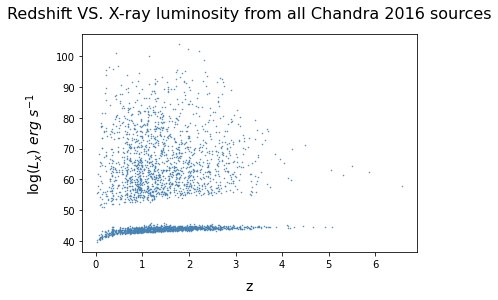

In [108]:
# plot luminosity vs redshift for all sources
plt.plot(z_data_good, Lint, 'o', c='steelblue', markersize=0.5)
plt.title('Redshift VS. X-ray luminosity from all Chandra 2016 sources')
plt.xlabel('z')
plt.ylabel('$\log(L_x) \,\, erg \,\, s^{-1}$')
plt.savefig(path_fig+'\ZvsL_Chandra2016_all.png',bbox_inches ="tight",pad_inches=0.2,facecolor='w',edgecolor='w')
plt.show()

In [106]:
# cut Lint to select AGN
agn_cut = Lint > 47

# filter lists
Lint_agn = Lint[agn_cut]
z_agn = z_data_good[agn_cut]

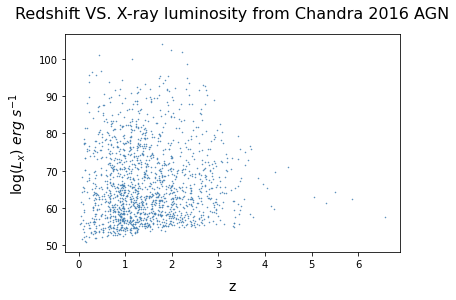

In [109]:
# plot luminosity vs redshift for agn
plt.plot(z_agn, Lint_agn, 'o', c='steelblue', markersize=0.5)
plt.title('Redshift VS. X-ray luminosity from Chandra 2016 AGN')
plt.xlabel('z')
plt.ylabel('$\log(L_x) \,\, erg \,\, s^{-1}$')
plt.savefig(path_fig+'\ZvsL_Chandra2016_agn.png',bbox_inches ="tight",pad_inches=0.2,facecolor='w',edgecolor='w')
plt.show()